* # **Preparation:**

## Import libs

In [71]:
# If not installed, install tidyverse
if (!require("tidyverse")) install.packages("tidyverse")
library(tidyverse) # metapackage of all tidyverse packages

# Put the path to the directory where the repository was cloned below:
path <- "/home/calili_trybe/Área de Trabalho/Google Certificate/Dados/Repo Desafio Final/data_and_notebooks"

# List all files in the directory
print("Files in the directory:")
list.files(path = path)


[1] "Files in the directory:"


[1] "labor-in-brazil-2012-2023.ipynb"    "tabela_1736_sidra_ibge.csv"        
[3] "tabela_5434_sidra_ibge.csv"         "tabela_5442_sidra_ibge.csv"        
[5] "trabalho-no-brasil-2012-2023.ipynb"

## Reading files

In [72]:
# Set sep and header attributes because csv structure.

reading_files <- function(file_path) {
    return(
        read.csv(file_path, sep=";", header=FALSE)
    )
}

workers_quantity_file <- "tabela_5434_sidra_ibge.csv"
workers_salary_file <- "tabela_5442_sidra_ibge.csv"
brazil_price_index <- "tabela_1736_sidra_ibge.csv"

quantity_data <- reading_files(workers_quantity_file)
salary_data <- reading_files(workers_salary_file)
price_index_data <- reading_files(brazil_price_index)

## quantity_data view

In [73]:
# View(quantity_data)

# salary_data view

In [74]:
# View(salary_data)

# price_index_data view

In [75]:
# View(price_index_data)

# Remove unecessary columns and rows

In [76]:
# set drop argument to preserve first column 
# colnames to using first line values for column names, and remove first line in return
remove_values <- function(dataframe, lines_to_remove) {
    dataframe <- dataframe[-lines_to_remove, , drop=FALSE]
    colnames(dataframe) <- dataframe[1, ]
    return(
        dataframe[-1, ]
    )
}

lines_to_remove_in_quantity_data <- c(1:3, 5, 51:63)
lines_to_remove_in_salary_data <- c(1:3, 50:62)
lines_to_remove_in_price_index_data <- c(1:2, 49:61)

# set subset to remove column 2 of the dataframes
quantity_data <- subset(remove_values(quantity_data, lines_to_remove_in_quantity_data), select=-2)
salary_data <- subset(remove_values(salary_data, lines_to_remove_in_salary_data), select=-c(2:3))
price_index_data <- subset(remove_values(price_index_data, lines_to_remove_in_price_index_data), select=-2)

# View quantity_data after remove

In [77]:
# View(quantity_data)

# View salary_data after remove

In [78]:
# View(salary_data)

# View price_index_data after remove

In [79]:
# View(price_index_data)

# Pivot dataframes

In [80]:
pivot_dataframe <- function(dataframe, value_column) {
    return(
        pivot_longer(
            dataframe,
            cols=-"Trimestre",
            names_to="Setor",
            values_to=value_column
        )
    )
}

quantity_data <- pivot_dataframe(quantity_data, "Quantidade")

salary_data <- pivot_dataframe(salary_data, "Salário")

# quantity and salary sample after pivoting

In [81]:
print("Sample of quantity data:")
head(quantity_data)

print("Sample of salary data:")
head(salary_data)

[1] "Sample of quantity data:"


Trimestre,Setor,Quantidade
<chr>,<chr>,<chr>
1º trimestre 2012,"Agricultura, pecuária, produção florestal, pesca e aquicultura",10147
1º trimestre 2012,Indústria geral,13075
1º trimestre 2012,Indústria de transformação,11640
1º trimestre 2012,Construção,7174
1º trimestre 2012,"Comércio, reparação de veículos automotores e motocicletas",16601
1º trimestre 2012,"Transporte, armazenagem e correio",4067


[1] "Sample of salary data:"


Trimestre,Setor,Salário
<chr>,<chr>,<chr>
1º trimestre 2012,"Agricultura, pecuária, produção florestal, pesca e aquicultura",1456
1º trimestre 2012,Indústria geral,2754
1º trimestre 2012,Indústria de transformação,2642
1º trimestre 2012,Construção,2202
1º trimestre 2012,"Comércio, reparação de veículos automotores e motocicletas",2366
1º trimestre 2012,"Transporte, armazenagem e correio",2877


# Join quantity and salary dataframes

In [82]:
common_columns <- c("Trimestre", "Setor")

dataframe <- merge(quantity_data, salary_data, by=common_columns)

# sort data by Setor column with arrange function
dataframe <- arrange(dataframe, Setor)

print("Sample of merged data:")
head(dataframe)

[1] "Sample of merged data:"


,Trimestre,Setor,Quantidade,Salário
,<chr>,<chr>,<chr>,<chr>
1,1º trimestre 2012,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13862,3841
2,1º trimestre 2013,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13937,3915
3,1º trimestre 2014,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14506,4017
4,1º trimestre 2015,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14650,4038
5,1º trimestre 2016,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",15040,4004
6,1º trimestre 2017,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14743,4151


# Adjust columns types from dataframe

In [83]:
# Convert "Quantidade" column to integer
dataframe$Quantidade <- as.integer(dataframe$Quantidade)

# Convert "Salário" column to integer
dataframe$Salário <- as.integer(dataframe$Salário)

# Remove the "º trimestre" part of the values in the "Trimestre" column
dataframe$Trimestre <- sub("º trimestre", "", dataframe$Trimestre)

# Convert the "Trimestre" column to date format
dataframe$Trimestre <- parse_date_time(dataframe$Trimestre, "qY")

# Exclude rows with value "Atividades mal definidas" in the "Setor" column
dataframe <- subset(dataframe, Setor != "Atividades mal definidas")

# Translate column names to english
colnames(dataframe) <- c("Quarter", "Sector", "Quantity", "Salary")

# Adjust columns from price_index_data

In [84]:
# Format the date in the "Mês" column from price_index_data

# Dictionary of months correspondence
months_number <- c("janeiro" = 1, "abril" = 4, "julho" = 7, "outubro" = 10)

# Extract the year and month from the "Mês" column
month_year <- strsplit(price_index_data$Mês, " ")
months <- sapply(month_year, `[`, 1)
years <- sapply(month_year, `[`, 2)

# Convert the month to number using the dictionary
months_number <- months_number[months]

# Build the date in the desired format
date <- parse_date_time(paste0("01 ", paste(months_number, years, sep = " ")), "dmY")

# Update the "Mês" column with the formatted date
price_index_data$Mês <- date

# Translate column names to english
colnames(price_index_data) <- c("Quarter", "Quarter_Inflation")

# Convert the "Quarter_Inflation" column to numeric
price_index_data$Quarter_Inflation <- as.numeric(gsub(",", ".", price_index_data$Quarter_Inflation))

print("Sample of price index data:")
head(price_index_data)

[1] "Sample of price index data:"


,Quarter,Quarter_Inflation
,<dttm>,<dbl>
4,2012-01-01,1.60
5,2012-04-01,1.21
6,2012-07-01,1.24
7,2012-10-01,1.80
8,2013-01-01,2.22
9,2013-04-01,1.72


# Create Accum_Quarter_Inflation column

In [85]:
# create a new column with the inflation factor
price_index_data$quarter_inflation_factor <- (price_index_data$Quarter_Inflation / 100) + 1

# create a new column with the accumulated inflation factor
price_index_data$accumulated_quarter_inflation_factor <- cumprod(price_index_data$quarter_inflation_factor)

# set the first value of the accumulated inflation factor to 1
price_index_data$accumulated_quarter_inflation_factor[1] <- 1

print("Sample of price index data:")
head(price_index_data)

[1] "Sample of price index data:"


,Quarter,Quarter_Inflation,quarter_inflation_factor,accumulated_quarter_inflation_factor
,<dttm>,<dbl>,<dbl>,<dbl>
4,2012-01-01,1.60,1.0160,1.000000
5,2012-04-01,1.21,1.0121,1.028294
6,2012-07-01,1.24,1.0124,1.041044
7,2012-10-01,1.80,1.0180,1.059783
8,2013-01-01,2.22,1.0222,1.083310
9,2013-04-01,1.72,1.0172,1.101943


# Create adjust_salary column in dataframe

In [86]:
#every salary * fator_inflacao_trimestre_acumulada

#Loop to calculate the adjusted salary
for (i in 1:nrow(dataframe)) {
  # Search for the index of the quarter in the price_index dataframe
  index <- match(dataframe$Quarter[i], price_index_data$Quarter)
  
  dataframe$adjusted_salary[i] <- round(dataframe$Salary[i] / price_index_data$accumulated_quarter_inflation_factor[index], digits=2)
}

print("Sample of merged data with adjusted_salary column:")
head(dataframe)

[1] "Sample of merged data with adjusted_salary column:"


,Quarter,Sector,Quantity,Salary,adjusted_salary
,<dttm>,<chr>,<int>,<int>,<dbl>
1,2012-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13862,3841,3841.00
2,2013-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13937,3915,3613.92
3,2014-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14506,4017,3522.97
4,2015-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14650,4038,3305.93
5,2016-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",15040,4004,2944.81
6,2017-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14743,4151,2895.79


# List Sector column values in dataframe

In [87]:
print(unique(dataframe$Sector))

 [1] "Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais"    
 [2] "Agricultura, pecuária, produção florestal, pesca e aquicultura"                                 
 [3] "Alojamento e alimentação"                                                                       
 [4] "Comércio, reparação de veículos automotores e motocicletas"                                     
 [5] "Construção"                                                                                     
 [6] "Indústria de transformação"                                                                     
 [7] "Indústria geral"                                                                                
 [8] "Informação, comunicação e atividades financeiras, imobiliárias, profissionais e administrativas"
 [9] "Outro serviço"                                                                                  
[10] "Serviço doméstico"                                                 

# Create is_predominant_tech column in dataframe

In [88]:
is_predominant_tech_values <- c(
    "Indústria de transformação",
    "Indústria geral",
    "Informação, comunicação e atividades financeiras, imobiliárias, profissionais e administrativas"
)

dataframe$is_predominant_tech <- dataframe$Sector %in% is_predominant_tech_values

head(subset(dataframe, is_predominant_tech == TRUE))

,Quarter,Sector,Quantity,Salary,adjusted_salary,is_predominant_tech
,<dttm>,<chr>,<int>,<int>,<dbl>,<lgl>
271,2012-01-01,Indústria de transformação,11640,2642,2642.00,TRUE
272,2013-01-01,Indústria de transformação,11782,2620,2418.51,TRUE
273,2014-01-01,Indústria de transformação,11723,2802,2457.40,TRUE
274,2015-01-01,Indústria de transformação,12071,2820,2308.75,TRUE
275,2016-01-01,Indústria de transformação,10716,2733,2010.03,TRUE
276,2017-01-01,Indústria de transformação,10287,2734,1907.27,TRUE


# Check no tech sectors

In [89]:
head(subset(dataframe, is_predominant_tech == FALSE))

,Quarter,Sector,Quantity,Salary,adjusted_salary,is_predominant_tech
,<dttm>,<chr>,<int>,<int>,<dbl>,<lgl>
1,2012-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13862,3841,3841.00,FALSE
2,2013-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13937,3915,3613.92,FALSE
3,2014-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14506,4017,3522.97,FALSE
4,2015-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14650,4038,3305.93,FALSE
5,2016-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",15040,4004,2944.81,FALSE
6,2017-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14743,4151,2895.79,FALSE


* # **Analysis:**

___
## Summary

In [90]:
print("Statistics summary of the dataframe:")
summary.data.frame(dataframe)

[1] "Statistics summary of the dataframe:"


    Quarter                       Sector             Quantity    
 Min.   :2012-01-01 00:00:00   Length:495         Min.   : 3749  
 1st Qu.:2014-10-01 00:00:00   Class :character   1st Qu.: 5308  
 Median :2017-07-01 00:00:00   Mode  :character   Median : 8781  
 Mean   :2017-07-01 12:16:00                      Mean   : 9360  
 3rd Qu.:2020-04-01 00:00:00                      3rd Qu.:12028  
 Max.   :2023-01-01 00:00:00                      Max.   :19231  
     Salary     adjusted_salary  is_predominant_tech
 Min.   :1025   Min.   : 552.6   Mode :logical      
 1st Qu.:2009   1st Qu.:1298.5   FALSE:360          
 Median :2353   Median :1762.2   TRUE :135          
 Mean   :2532   Mean   :1828.8                      
 3rd Qu.:2854   3rd Qu.:2228.2                      
 Max.   :4491   Max.   :3841.0                      

___
* ## **Analysis of the number of professionals in predominantly technology sectors**


## Subset joining Quantity by is_predominant_tech column

In [91]:
subset_is_predominant_tech_by_quantity <- aggregate(
    Quantity ~ Quarter + is_predominant_tech, 
    data=dataframe, 
    FUN=sum
)

print("Sample of the dataframe:")
head(subset_is_predominant_tech_by_quantity)
print("Statistics summary of the joining dataframe:")
summary(subset_is_predominant_tech_by_quantity["Quantity"])

[1] "Sample of the dataframe:"


,Quarter,is_predominant_tech,Quantity
,<dttm>,<lgl>,<int>
1,2012-01-01,FALSE,65397
2,2012-04-01,FALSE,66849
3,2012-07-01,FALSE,67219
4,2012-10-01,FALSE,67593
5,2013-01-01,FALSE,66740
6,2013-04-01,FALSE,67688


[1] "Statistics summary of the joining dataframe:"


    Quantity    
 Min.   :30885  
 1st Qu.:34238  
 Median :49474  
 Mean   :51479  
 3rd Qu.:68769  
 Max.   :74733  

## Evolution of the number of professionals during the survey

[1] " Visualizations of the dataframe:"


`geom_smooth()` using formula = 'y ~ x'


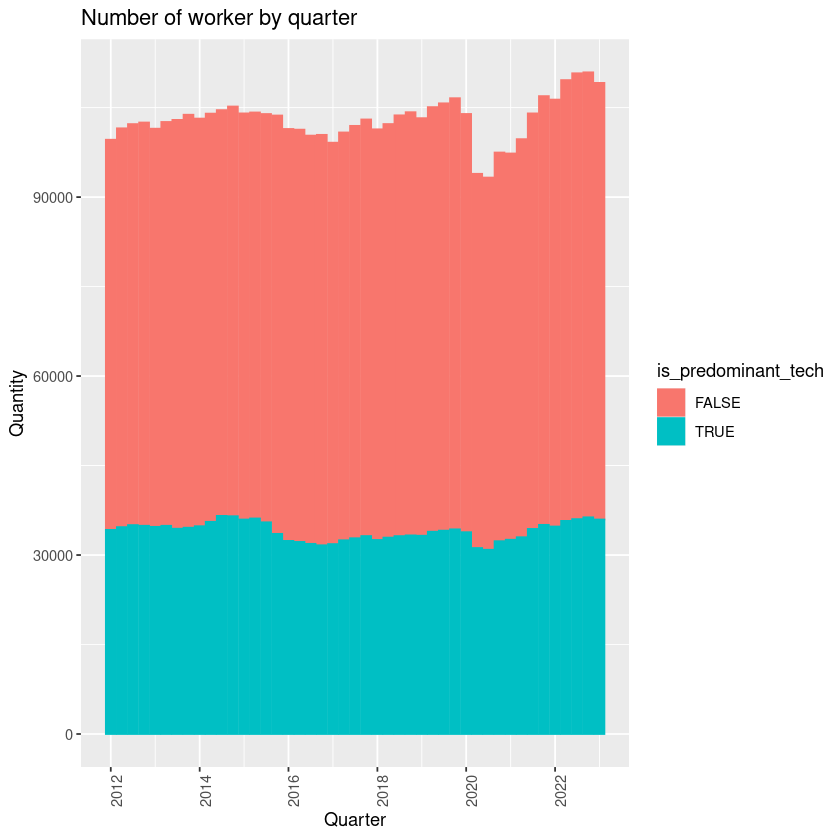

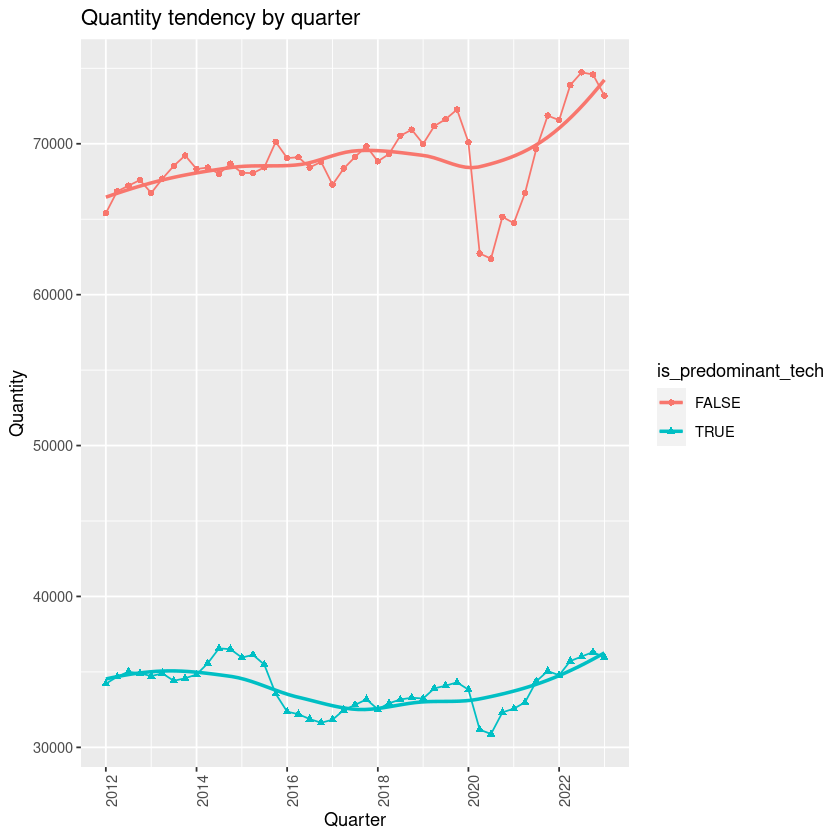

In [92]:
print(" Visualizations of the dataframe:")
ggplot(subset_is_predominant_tech_by_quantity, aes(x = Quarter, y = Quantity, fill = is_predominant_tech, color=is_predominant_tech, shape=is_predominant_tech)) +
    geom_bar(stat = "identity", position = "stack") +
    labs(x = "Quarter", y = "Quantity") +
    ggtitle("Number of worker by quarter") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

ggplot(subset_is_predominant_tech_by_quantity, aes(x = Quarter, y = Quantity, color=is_predominant_tech, shape=is_predominant_tech)) + 
    geom_line() + 
    geom_point() + 
    geom_smooth(method="loess", se=FALSE) +
    labs(title="Quantity tendency by quarter", x="Quarter", y="Quantity") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Comparison of the number of professionals during the survey

[1] "Comparing the variation of the quantity between the Tech and No Tech sectors:"


 percent_quantity_variation_tech percent_quantity_variation_no_tech
 Min.   :-9.7400                 Min.   :-4.600                    
 1st Qu.:-4.1000                 1st Qu.: 3.500                    
 Median : 0.0000                 Median : 5.200                    
 Mean   :-0.6453                 Mean   : 5.454                    
 3rd Qu.: 2.3400                 3rd Qu.: 7.230                    
 Max.   : 6.8600                 Max.   :14.280                    

,Quarter,percent_quantity_variation_tech,percent_quantity_variation_no_tech
,<dttm>,<dbl>,<dbl>
45,2023-01-01,5.08,11.91


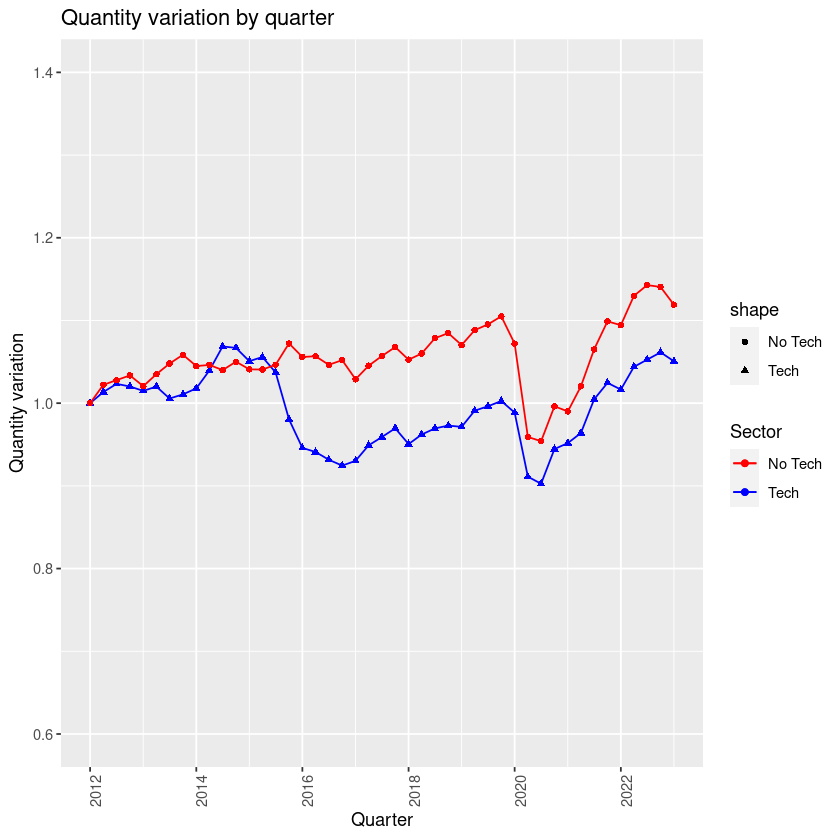

In [93]:
# Create a subset with only the values TRUE of the column "is_predominant_tech" 
subset_true <- subset_is_predominant_tech_by_quantity[
  subset_is_predominant_tech_by_quantity$is_predominant_tech == TRUE, 
]

# Create a subset with only the values FALSE of the column "is_predominant_tech"
subset_false <- subset_is_predominant_tech_by_quantity[
  subset_is_predominant_tech_by_quantity$is_predominant_tech == FALSE, 
]

# Create a new column with the variation of the quantity of workers in the tech sector
subset_true$tech_quantity_variation <- subset_true$Quantity / subset_true$Quantity[1]
subset_false$no_tech_quantity_variation <- subset_false$Quantity / subset_false$Quantity[1]

# merge subset_true e subset_false for selected columns
merge_subset <- merge(
  subset_true[, c("Quarter", "tech_quantity_variation", "is_predominant_tech")], 
  subset_false[, c("Quarter", "no_tech_quantity_variation", "is_predominant_tech")], 
  by = "Quarter"
)

# Create a new column with the percent variation of the quantity of workers in the tech sector
merge_subset$percent_quantity_variation_tech <- round((merge_subset$tech_quantity_variation -1) * 100, 2)
merge_subset$percent_quantity_variation_no_tech <- round((merge_subset$no_tech_quantity_variation -1) * 100, 2)

print("Comparing the variation of the quantity between the Tech and No Tech sectors:")
summary(merge_subset[c("percent_quantity_variation_tech", "percent_quantity_variation_no_tech")])

tail(select(merge_subset,c("Quarter", "percent_quantity_variation_tech", "percent_quantity_variation_no_tech")), 1)

ggplot(merge_subset, aes(x = Quarter)) +
  geom_line(aes(y = tech_quantity_variation, color = "Tech")) +
  geom_point(aes(y = tech_quantity_variation, color = "Tech", shape = "Tech")) +
  geom_line(aes(y = no_tech_quantity_variation, color = "No Tech")) +
  geom_point(aes(y = no_tech_quantity_variation, color = "No Tech", shape = "No Tech")) +
  labs(title="Quantity variation by quarter", x = "Quarter", y = "Quantity variation") +
  scale_color_manual(values = c("Tech" = "blue", "No Tech" = "red"), name="Sector") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylim(0.6, 1.4)


___
* ## **Analysis of the earnings of professionals in predominantly technology sectors**

## Subset joining Salary by is_predominant_tech column

In [94]:
subset_is_predominant_tech_by_salary <- aggregate(
    cbind(Salary, adjusted_salary) ~ Quarter + is_predominant_tech, 
    data=dataframe, 
    FUN=mean
)

print("Sample of the dataframe:")
head(subset_is_predominant_tech_by_salary)
print("Statistics summary of the joining dataframe:")
summary(subset_is_predominant_tech_by_salary[c("Salary", "adjusted_salary")])

[1] "Sample of the dataframe:"


,Quarter,is_predominant_tech,Salary,adjusted_salary
,<dttm>,<lgl>,<dbl>,<dbl>
1,2012-01-01,FALSE,2248.750,2248.750
2,2012-04-01,FALSE,2258.250,2196.115
3,2012-07-01,FALSE,2245.625,2157.088
4,2012-10-01,FALSE,2242.375,2115.881
5,2013-01-01,FALSE,2278.625,2103.391
6,2013-04-01,FALSE,2316.625,2102.310


[1] "Statistics summary of the joining dataframe:"


     Salary     adjusted_salary
 Min.   :2118   Min.   :1144   
 1st Qu.:2283   1st Qu.:1570   
 Median :2656   Median :2045   
 Mean   :2741   Mean   :1979   
 3rd Qu.:3196   3rd Qu.:2237   
 Max.   :3551   Max.   :3079   

## Evolution of the earnings of professionals during the survey

[1] " Visualizations of the dataframe:"


`geom_smooth()` using formula = 'y ~ x'


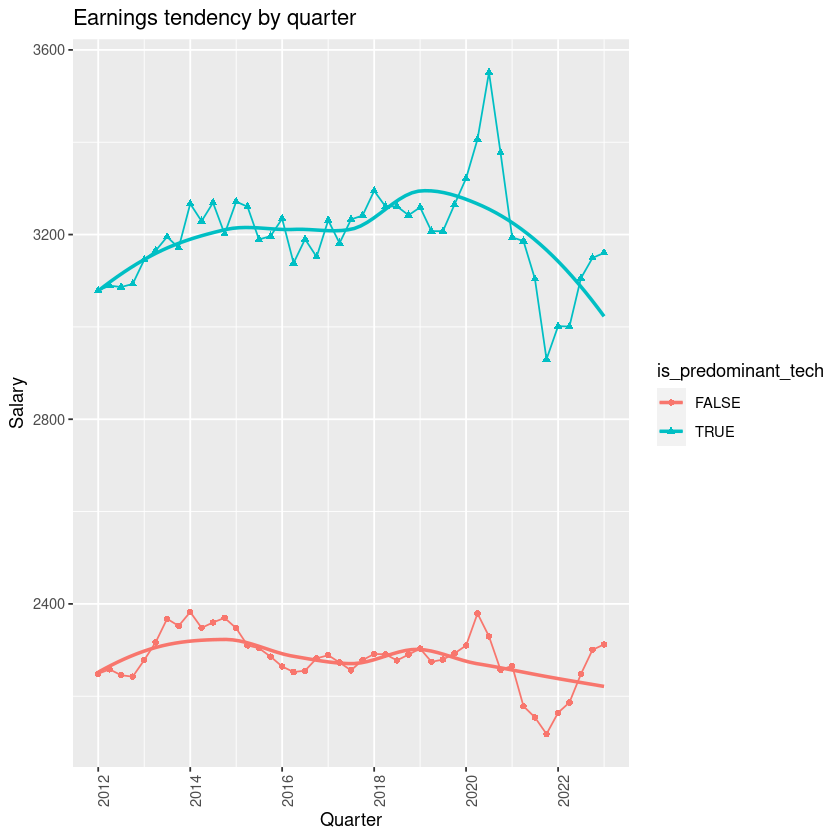

In [95]:
print(" Visualizations of the dataframe:")
ggplot(subset_is_predominant_tech_by_salary, aes(x=Quarter, y=Salary, color=is_predominant_tech, shape=is_predominant_tech)) + 
    geom_line() + 
    geom_point() + 
    geom_smooth(method="loess", se=FALSE) +
    labs(title="Earnings tendency by quarter", x="Quarter", y="Salary") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Comparison of the earnings of professionals during the survey

[1] "Comparing the variation of the salary between the Tech and No Tech sectors:"


 percent_salary_variation_tech percent_salary_variation_no_tech
 Min.   :-4.840                Min.   :-5.800                  
 1st Qu.: 2.280                1st Qu.: 0.330                  
 Median : 3.820                Median : 1.480                  
 Mean   : 3.926                Mean   : 1.463                  
 3rd Qu.: 5.890                3rd Qu.: 2.730                  
 Max.   :15.340                Max.   : 5.950                  

,Quarter,percent_salary_variation_tech,percent_salary_variation_no_tech
,<dttm>,<dbl>,<dbl>
45,2023-01-01,2.64,2.82


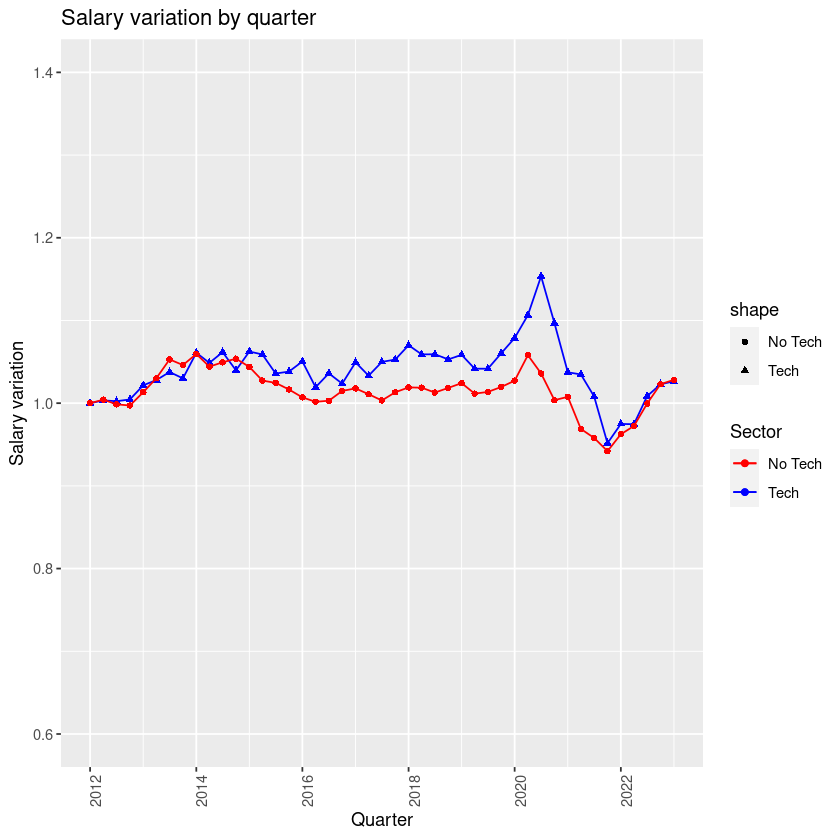

In [96]:
# Create a subset with only the values TRUE of the column "is_predominant_tech"
subset_true <- subset_is_predominant_tech_by_salary[
  subset_is_predominant_tech_by_salary$is_predominant_tech == TRUE, 
]

# Create a subset with only the values FALSE of the column "is_predominant_tech"
subset_false <- subset_is_predominant_tech_by_salary[
  subset_is_predominant_tech_by_salary$is_predominant_tech == FALSE, 
]

# Create a new column with the variation of the salary of workers in the tech sector
subset_true$tech_salary_variation <- subset_true$Salary / subset_true$Salary[1]
subset_false$no_tech_salary_variation <- subset_false$Salary / subset_false$Salary[1]

# merge subset_true e subset_false for selected columns
merge_subset <- merge(
  subset_true[, c("Quarter", "tech_salary_variation", "is_predominant_tech")], 
  subset_false[, c("Quarter", "no_tech_salary_variation", "is_predominant_tech")], 
  by = "Quarter"
)

# Create a new column with the percent variation of the salary of workers in the tech sector
merge_subset$percent_salary_variation_tech <- round((merge_subset$tech_salary_variation -1) * 100, 2)
merge_subset$percent_salary_variation_no_tech <- round((merge_subset$no_tech_salary_variation -1) * 100, 2)

print("Comparing the variation of the salary between the Tech and No Tech sectors:")
summary(merge_subset[c("percent_salary_variation_tech", "percent_salary_variation_no_tech")])

tail(select(merge_subset,c("Quarter", "percent_salary_variation_tech", "percent_salary_variation_no_tech")), 1)

ggplot(merge_subset, aes(x = Quarter)) +
  geom_line(aes(y = tech_salary_variation, color = "Tech")) +
  geom_point(aes(y = tech_salary_variation, color = "Tech", shape = "Tech")) +
  geom_line(aes(y = no_tech_salary_variation, color = "No Tech")) +
  geom_point(aes(y = no_tech_salary_variation, color = "No Tech", shape = "No Tech")) +
  labs(title="Salary variation by quarter", x = "Quarter", y = "Salary variation") +
  scale_color_manual(values = c("Tech" = "blue", "No Tech" = "red"), name="Sector") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylim(0.6, 1.4)


## Comparison of the adjusted earnings of professionals during the survey

[1] "Comparision of the variation of the adjusted salary between the Tech and No Tech sectors:"


 percent_adjusted_salary_variation_tech
 Min.   :-49.00                        
 1st Qu.:-32.33                        
 Median :-27.39                        
 Mean   :-25.04                        
 3rd Qu.:-12.62                        
 Max.   :  0.00                        
 percent_adjusted_salary_variation_no_tech
 Min.   :-49.11                           
 1st Qu.:-34.72                           
 Median :-30.15                           
 Mean   :-26.66                           
 3rd Qu.:-11.44                           
 Max.   :  0.00                           

,Quarter,percent_adjusted_salary_variation_tech,percent_adjusted_salary_variation_no_tech
,<dttm>,<dbl>,<dbl>
45,2023-01-01,-47.26,-47.17


Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


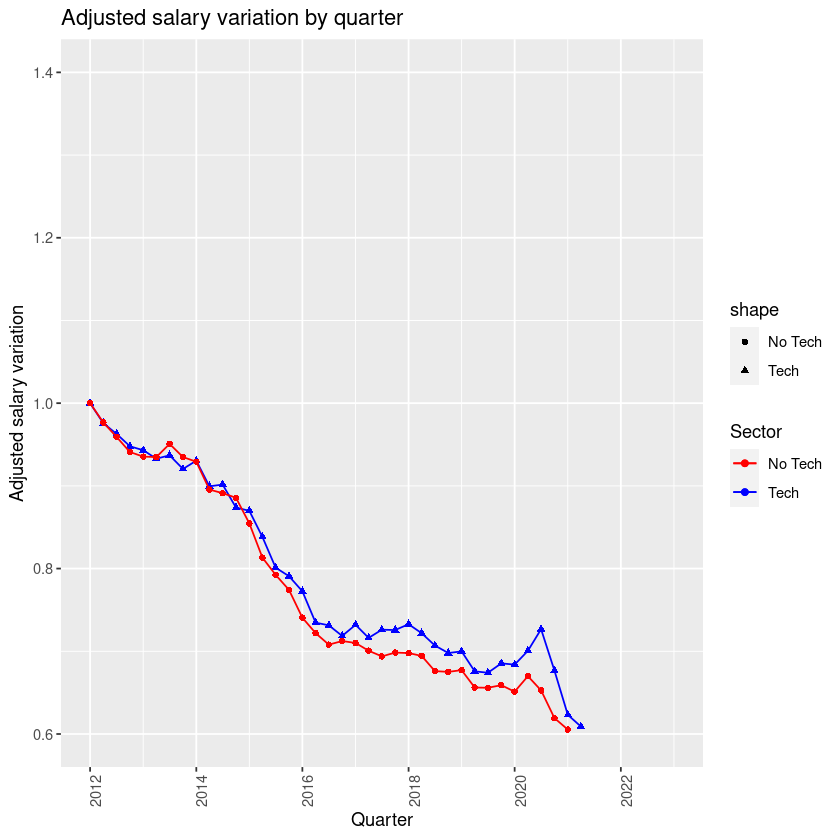

In [97]:
# Create a subset with only the values TRUE of the column "is_predominant_tech"
subset_true <- subset_is_predominant_tech_by_salary[
  subset_is_predominant_tech_by_salary$is_predominant_tech == TRUE, 
]

subset_false <- subset_is_predominant_tech_by_salary[
  subset_is_predominant_tech_by_salary$is_predominant_tech == FALSE, 
]

# Create a new column with the variation of the salary of workers in the tech sector
subset_true$tech_adjusted_salary_variation <- subset_true$adjusted_salary / subset_true$adjusted_salary[1]
subset_false$no_tech_adjusted_salary_variation <- subset_false$adjusted_salary / subset_false$adjusted_salary[1]

# merge subset_true and subset_false for selected columns
merge_subset <- merge(
  subset_true[, c("Quarter", "tech_adjusted_salary_variation", "is_predominant_tech")], 
  subset_false[, c("Quarter", "no_tech_adjusted_salary_variation", "is_predominant_tech")], 
  by = "Quarter"
)

# Create a new column with the percent variation of the adjusted_salary of workers in the tech sector
merge_subset$percent_adjusted_salary_variation_tech <- round((merge_subset$tech_adjusted_salary_variation -1) * 100, 2)
merge_subset$percent_adjusted_salary_variation_no_tech <- round((merge_subset$no_tech_adjusted_salary_variation -1) * 100, 2)

print("Comparision of the variation of the adjusted salary between the Tech and No Tech sectors:")
summary(merge_subset[c("percent_adjusted_salary_variation_tech", "percent_adjusted_salary_variation_no_tech")])

tail(select(merge_subset,c("Quarter", "percent_adjusted_salary_variation_tech", "percent_adjusted_salary_variation_no_tech")), 1)

ggplot(merge_subset, aes(x = Quarter)) +
  geom_line(aes(y = tech_adjusted_salary_variation, color = "Tech")) +
  geom_point(aes(y = tech_adjusted_salary_variation, color = "Tech", shape = "Tech")) +
  geom_line(aes(y = no_tech_adjusted_salary_variation, color = "No Tech")) +
  geom_point(aes(y = no_tech_adjusted_salary_variation, color = "No Tech", shape = "No Tech")) +
  labs(title="Adjusted salary variation by quarter", x = "Quarter", y = "Adjusted salary variation") +
  scale_color_manual(values = c("Tech" = "blue", "No Tech" = "red"), name="Sector") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylim(0.6, 1.4)

## 

* # **Conclusions:**
    ## **1. Aims:**
        The aim was to identify if the predominant tech sectors had increased in the number and wages of  workers during the survey (2012-2023). The idea was to investigate the greater presence of tech sectors in the Brazilian labor market by looking at these two variables.
        The source of data was the Sidra system from IBGE for the definition of the number (table 5434), salary (table 5442), and price index (table 1736) used.
    ## **2. Answers:**
        From the questions that guided the survey, these were the considerations based on the data:

        1. There had been an increase of 5.08% in the worker numbers from the group of sectors defined as predominant techs from 2012 to 2023.
        1.1. The no tech group had a growth rate of 11.91% in the period.

        2. There was an increase in the average earnings of 2.64% for technology workers in the period.
        2.1. The no tech group had a growth rate of 2.82% instead of the greater average values of the tech group.
        2.2. With the inflation, both had a decrease of -47.26% and -47.17% for the tech and no tech groups, respectively.
    ## **3. Considerations:**
        From the data, we could see inferior growth in the number and earnings from the predominant tech sectors in comparison to the non-tech sectors.

        The survey suggests that there wasn't a greater presence of technology sectors in the Brazilian stock markets, but instead a superior salary for the non-tech group. (R$2930-R$3551 range for techs and R$2118-R$2382 for no techs)

    ## **4. Limitations:**
        The sample had characteristics that reduced the identification of the predominant tech sectors, which could bring better accuracy to the data analysis.


    ## **5. Next steps:**
        In future works, temporal series instruments (structure break, variance analysis, etc.) could benefit the analysis, and the utilization of other sources of data.